# Narrator Offline Example

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
import PIL
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

sys.path.append('../')
from src.Narrator import Narrator

%matplotlib inline

In [25]:
narrator = Narrator()

## Generating Image Caption Example

'a man riding a skateboard up the side of a ramp .'

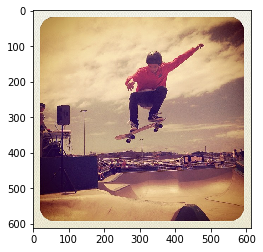

In [26]:
f = os.environ['HOME'] + '/Database/coco/images/val2017/000000581357.jpg'
im = PIL.Image.open(f).convert('RGB')
plt.imshow(im)
narrator.gen_caption(f, as_string=True)

## Generating Video Caption Example

In [27]:
f = os.environ['HOME'] + '/Database/MSR-VTT/test-video/video12498.mp4'
caption = narrator.gen_caption(f, as_string=True)
caption

'a person is cooking'

## Generating Audio File Example

In [28]:
narrator.gen_audio_file(caption, 'test.ogg')

ipd.Audio('test.ogg')

# True Label Example

In [29]:
cocoapi_path = os.environ['HOME'] + '/programs/cocoapi/'
coco_set = 'val2017'
max_len = 35

In [30]:
sys.path.append(cocoapi_path + 'PythonAPI')
from pycocotools.coco import COCO
import pandas as pd

In [31]:
coco = COCO(cocoapi_path + 'annotations/instances_{}.json'.format(coco_set))
cocoCaptionDF = pd.read_csv(cocoapi_path + 'annotations/coco_captions.csv')
cocoCaptionDF = cocoCaptionDF[cocoCaptionDF['set'] == coco_set]

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


In [32]:
im_id = 210789
url = coco.loadImgs(im_id)[0]['coco_url']

In [33]:
gts = cocoCaptionDF[cocoCaptionDF['id'] == im_id]['caption']

In [34]:
gts.values

array(['An adult standing behind a little girl while holding an umbrella.',
       'The two people are standing under an umbrella in the rain.',
       'Two girls under a large umbrella in the rain',
       'A couple of people standing with a umbrella.',
       'A child and person stand under an umbrella. '], dtype=object)

In [35]:
gts = gts.apply(lambda x: narrator.coco_vocab.encode(x, max_len+1))
gts = gts.apply(lambda x: narrator.coco_vocab.decode(x, clean=True))

In [36]:
caption = narrator.gen_caption(url, beam_size=8)
print (' '.join(caption))

a little girl in a pink dress holding an umbrella .


In [37]:
bleu = narrator.coco_vocab.evaluate(gts, caption)
bleu

0.32992925790017896

# Video Captioning By Scene Example

In [38]:
video_path = os.environ['HOME'] + '/narrator/samples/seinfeld.mp4'

In [39]:
captions, scene_change_timecodes = narrator.gen_caption(video_path, by_scene=True, as_string=True)

100%|██████████| 16452/16452 [00:36<00:00, 455.55frames/s]


Writing 16452 frames to CSV...


In [40]:
for cap, t in zip(captions, scene_change_timecodes):
    print (t, cap)

00:00:00 a man is talking
00:01:21 a woman is talking
00:03:10 a man is talking
00:03:37 a man is talking
00:03:43 a man is talking
00:03:53 two men are talking
00:04:01 a man is talking
00:04:07 two men are talking
00:04:10 a man is talking
00:04:21 a man is talking
00:06:43 a man is talking
